In [20]:
#%%

# Libraries

In [103]:
#import libraries

import pandas as pd
from scipy import stats
import numpy as np
from pandas.plotting import scatter_matrix # for plotting data
from statsmodels.formula.api import ols 
import seaborn ## for statistical visualizations
from matplotlib import pyplot as plt

# Loading in Data

In [22]:
## Load In Data
df = pd.read_csv(r"C:\Users\Alice\Documents\GitHub\descriptives-scipy\data\sizes_brain.csv", sep=';', na_values=".") # load in csv file

In [23]:
df

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


# CREATING DATAFRAMES USING NUMPY ARRAYS

In [24]:
#### CREATE DATAFRAME FROM NUMPY ARRAYS ####
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [25]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


In [26]:
df.shape # list # rows by columns: 40 x 8

(40, 8)

In [27]:
df.columns # list column names 

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [28]:
df.dtypes # check for different data types 

Unnamed: 0      int64
Gender         object
FSIQ            int64
VIQ             int64
PIQ             int64
Weight        float64
Height        float64
MRI_Count       int64
dtype: object

In [29]:
print(df['Height']) #list values of Height column

0     64.5
1     72.5
2     73.3
3     68.8
4     65.0
5     69.0
6     64.5
7     66.0
8     66.3
9     68.8
10    64.5
11    70.0
12    69.0
13    70.5
14    66.0
15    68.0
16    68.5
17    73.5
18    66.3
19    70.0
20     NaN
21    76.5
22    62.0
23    68.0
24    63.0
25    72.0
26    68.0
27    77.0
28    63.0
29    66.5
30    62.5
31    67.0
32    75.5
33    69.0
34    66.5
35    66.5
36    70.5
37    64.5
38    74.0
39    75.5
Name: Height, dtype: float64


## Exercise 1

## What is the mean value for VIQ for the full population?

In [30]:
VIQ_mean = df['VIQ'].mean()

In [31]:
VIQ_mean # view output: 112.35


112.35

## How many males/females were included in this study?

In [32]:
groupby_gender = df.groupby('Gender') # categorizes # males/females of each column

In [33]:
groupby_gender.count() # view output

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,18,19,20


## What is the average value of MRI counts expressed in log units, for males and females?

In [69]:
MRI_log2_mean = df['logarithim_base2'] #define variable for log2 mean

KeyError: 'logarithim_base2'

In [ ]:
df['logarithim_base2'] = np.log2(df['MRI_Count']) # using log 2

In [ ]:
MRI_log2_mean # view output

0     19.639856
1     19.933185
2     19.985982
3     19.880697
4     19.859912
5     19.825007
6     19.918969
7     19.704312
8     19.787332
9     19.865845
10    19.669459
11    20.041997
12    19.817625
13    19.708047
14    19.745335
15    19.722946
16    19.700907
17    19.850089
18    19.624031
19    19.761959
20    19.767363
21    19.789056
22    19.592623
23    19.865146
24    19.665829
25    19.835369
26    19.607135
27    20.018980
28    19.597960
29    19.725110
30    19.710252
31    19.856944
32    19.928572
33    19.747123
34    19.670283
35    19.854628
36    19.856649
37    19.769888
38    19.826896
39    19.835938
Name: logarithim_base2, dtype: float64

In [ ]:
MRI_log10_mean = df['logarithim_base10'] # define variable for log10 mean

In [ ]:
df['logarithim_base10'] = np.log2(df['MRI_Count']) # using log10

In [ ]:
MRI_log10_mean # view output 

0     19.639856
1     19.933185
2     19.985982
3     19.880697
4     19.859912
5     19.825007
6     19.918969
7     19.704312
8     19.787332
9     19.865845
10    19.669459
11    20.041997
12    19.817625
13    19.708047
14    19.745335
15    19.722946
16    19.700907
17    19.850089
18    19.624031
19    19.761959
20    19.767363
21    19.789056
22    19.592623
23    19.865146
24    19.665829
25    19.835369
26    19.607135
27    20.018980
28    19.597960
29    19.725110
30    19.710252
31    19.856944
32    19.928572
33    19.747123
34    19.670283
35    19.854628
36    19.856649
37    19.769888
38    19.826896
39    19.835938
Name: logarithim_base10, dtype: float64

# PLOTTING AND MANIPULATING DATA USING SCATTER MATRIX

## Exercise 2 
## Plot the scatter matrix for males only, and for females only. Do you think that the 2 sub-populations correspond to gender?

array([[<AxesSubplot: xlabel='PIQ', ylabel='PIQ'>,
        <AxesSubplot: xlabel='VIQ', ylabel='PIQ'>,
        <AxesSubplot: xlabel='FSIQ', ylabel='PIQ'>],
       [<AxesSubplot: xlabel='PIQ', ylabel='VIQ'>,
        <AxesSubplot: xlabel='VIQ', ylabel='VIQ'>,
        <AxesSubplot: xlabel='FSIQ', ylabel='VIQ'>],
       [<AxesSubplot: xlabel='PIQ', ylabel='FSIQ'>,
        <AxesSubplot: xlabel='VIQ', ylabel='FSIQ'>,
        <AxesSubplot: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

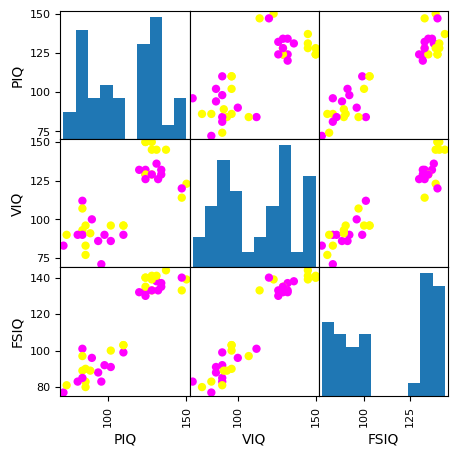

In [68]:
scatter_matrix(df[['PIQ', 'VIQ', 'FSIQ']], c=(df['Gender'] == 'Male'), figsize=(5,5), alpha= 1, marker='o', cmap='spring')
#alpha = # for transparency
#figsize = (20,20) for wxh size
#cmap = color map
#marker = 'shape' ('o', 'x')

# HYPOTHESIS TESTING: comparing 2 groups

## Exercise 3
## Test the difference between weights in males and females

In [87]:
stats.ttest_1samp(df.dropna()['Weight'], 0)
# tests if population of mean of data is likely to be equal to a given value 
# Resolved NA error by uding df.dropna to remove rows with NULL values

Ttest_1sampResult(statistic=39.65971373853829, pvalue=6.39263888216351e-32)

In [89]:
#using scipy t-test to create simple tests to compare 2 groups
female_weight = df.dropna()[df['Gender'] == 'Female']['Weight']

C:\Users\Alice\AppData\Local\Temp\ipykernel_14372\3125360211.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_weight = df.dropna()[df['Gender'] == 'Female']['Weight']


In [91]:
male_weight = df.dropna()[df['Gender'] == 'Male']['Weight']

C:\Users\Alice\AppData\Local\Temp\ipykernel_14372\2848463697.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_weight = df.dropna()[df['Gender'] == 'Male']['Weight']


In [93]:
stats.ttest_ind(female_weight, male_weight) 

Ttest_indResult(statistic=-4.870950921940696, pvalue=2.227293018362118e-05)

## Use non parametrics statistics to test the difference betweeen VIQ in males and females.

In [100]:
female_viq = df[df['Gender'] == 'Female']['VIQ']

In [101]:
male_viq = df[df['Gender'] == 'Male']['VIQ']

In [104]:
stats.mannwhitneyu(female_viq, male_viq)

MannwhitneyuResult(statistic=164.5, pvalue=0.3422886868727315)

# LINEAR MODELS, MULTIPLE FACTORS, AND ANALYSIS OF VARIANCE

## Exercise 4
## Retrieve the estimated parameters from the model above

In [105]:
# simple linear regressions
x = np.linspace (-5, 5, 20)


In [106]:
np.random.seed(1)

In [107]:
#normal distributed noise
y = -5 + 3*x + 4 * np.random.normal (size=x.shape)

In [110]:
#create a df containing all the relevant variables 
df = pd.DataFrame({'x':x, 'y':y})

In [111]:
df

,x,y
0,-5.000000,-13.502619
1,-4.473684,-20.868078
2,-3.947368,-18.954792
3,-3.421053,-19.555032
4,-2.894737,-10.222580
5,-2.368421,-21.311418
6,-1.842105,-3.547069
7,-1.315789,-11.992196
8,-0.789474,-6.092265
9,-0.263158,-6.786955


In [113]:
# using statsmodels.formula.api to specify an OLS model and fit it
model = ols("y ~ x", df).fit()

In [114]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           8.56e-08
Time:                        14:41:52   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

# MULTIPLE REGRESSION: INLCUDING MULTIPLE FACTORS
## POST-HOC HYPOTHESIS TESTING: ANALYSIS OF VARIANCE (ANOVA)

## Exercise 5
## Going back to the brain size + IQ data, test if the VIQ of male and female are different after removing the effect of brain size, height and weight.

In [119]:
df = pd.read_csv(r"C:\Users\Alice\Documents\GitHub\descriptives-scipy\data\sizes_brain.csv", sep=';', na_values=".")

In [127]:
model = ols('VIQ ~ Gender + MRI_Count + Height', df).fit()

In [128]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Mon, 19 Sep 2022   Prob (F-statistic):             0.0184
Time:                        14:53:20   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.

In [129]:
print (model.f_test([0, 1, -1,0]))

<F test: F=0.6831666424367195, p=0.41409780713179545, df_denom=35, df_num=1>
